# 1. IMPORTS E CARRREGAR O DATASET

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes   # <- ÚNICO uso de sklearn

diab = load_diabetes(as_frame=True)
df   = pd.concat([diab.data, diab.target.rename('y')], axis=1)

print("Shape:", df.shape)
df.head()

Shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Dicionário de colunas do `load_diabetes`

| Coluna original | Significado clínico                                    | Sugestão de novo nome |
|-----------------|--------------------------------------------------------|-----------------------|
| age             | Idade normalizada (anos)                               | `age` (manter)        |
| sex             | Sexo codificado             | `sex` (manter)        |
| bmi             | Índice de Massa Corporal                               | `bmi` (manter)        |
| bp              | Pressão arterial média                                 | `bp` (manter)         |
| s1              | **tc** – colesterol total                              | `tc`                  |
| s2              | **ldl** – lipoproteína de baixa densidade              | `ldl`                 |
| s3              | **hdl** – lipoproteína de alta densidade               | `hdl`                 |
| s4              | **tch** – razão tc/hdl                                 | `tch_ratio` ou `tch`  |
| s5              | **ltg** – log(triglicérides séricos)                   | `ltg`                 |
| s6              | **glu** – glicose sérica                               | `glu`                 |
| y               | Progressão da doença 1 ano após linha de base          | `y` (manter)          |

> Essas descrições vêm da documentação oficial do *Diabetes Dataset* do
> scikit-learn. Se ficar alguma dúvida, dá para consultar
> `load_diabetes?` no IPython.

Quer adotar esses nomes?

In [7]:
# CODE-CELL — renomeando conforme a tabela
name_map = {
    "s1":  "tc",
    "s2":  "ldl",
    "s3":  "hdl",
    "s4":  "tch_ratio",   # ou 'tch' se preferir curto
    "s5":  "ltg",
    "s6":  "glu"
}

df = df.rename(columns=name_map)
df.head()


,age,sex,bmi,bp,tc,ldl,hdl,tch_ratio,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# 2. Análise exploratória

### 2.1 Distribuições univariadas
Analise a forma (assimetria, cauda, outliers) de **todas** as variáveis contínuas.

*Qual destas variáveis parece mais assimétrica?*  
*Você percebe algum valor extremo incomum?*

In [ ]:
ax = df.drop(columns='y').hist(bins=30, figsize=(12,8), edgecolor='k')
plt.suptitle("Histogramas (features normalizadas)", y=1.02);

plt.figure(figsize=(4,3))
plt.hist(df['y'], bins=25, edgecolor='k')
plt.title("Histograma do alvo  y"); plt.xlabel("y"); plt.ylabel("Freq.");
plt.tight_layout(); plt.show()

### 2.2 Correlação

1. Quais são as **três** features mais correlacionadas com `y`?  
2. Isso bate com a sua intuição clínica?  
3. Alguma correlação forte entre features sugere problemas de colinearidade?

> Faça um heatmap ou outro gráfico à sua escolha.

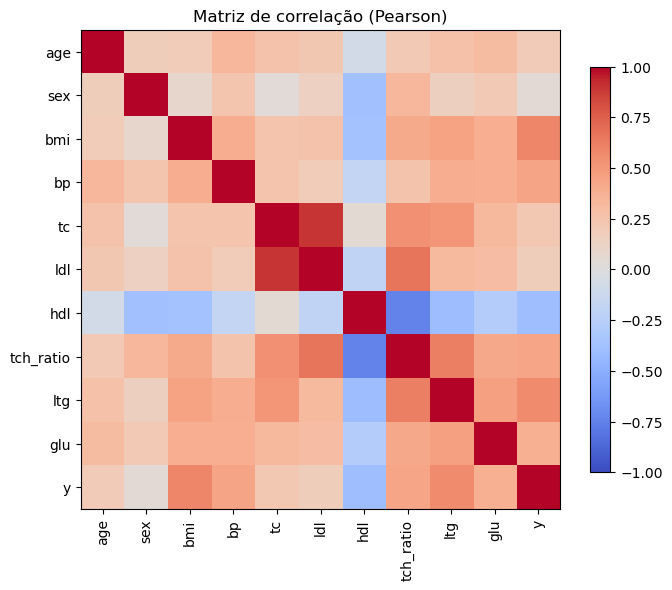

Top-3 features vs y:
 bmi    0.586450
ltg    0.565883
bp     0.441482
Name: y, dtype: float64


In [10]:
corr = df.corr()

plt.figure(figsize=(7,6))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im, shrink=.8)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de correlação (Pearson)")
plt.tight_layout(); plt.show()

# -- Top-3 correlações absolutas com y
abs_corr_y = corr['y'].abs().sort_values(ascending=False).iloc[1:4]
print("Top-3 features vs y:\n", abs_corr_y)


### 2.3 Relação BMI × y

Depois de plotar, responda:

* A nuvem de pontos sugere relação **linear**, **quadrática** ou nenhuma?  
* Isso justifica criar um termo de grau 2?

_Use 2 – 3 frases para argumentar._

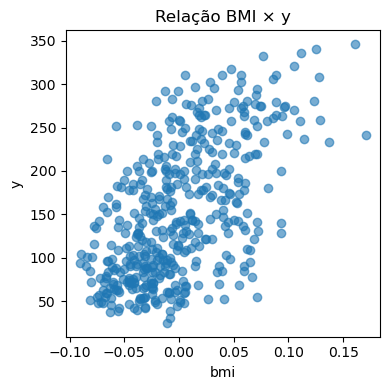

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(df['bmi'], df['y'], alpha=.6)
plt.xlabel("bmi"); plt.ylabel("y")
plt.title("Relação BMI × y")
plt.tight_layout(); plt.show()

### 2.4 Normalidade do alvo

• Gere um QQ-plot (ou histograma) de `y`.  
• O formato sugere usar **RMSE** ou **MAE** como métrica de erro?  
*Explique em 1 frase.*


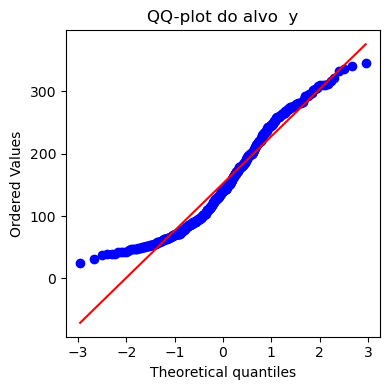

In [12]:
from scipy import stats
plt.figure(figsize=(4,4))
stats.probplot(df['y'], plot=plt)
plt.title("QQ-plot do alvo  y")
plt.tight_layout(); plt.show()


### 2.5 Categorias de BMI

Agrupe o índice de massa corporal em **terçis** (baixo, médio, alto) e compare as distribuições de `y`.

* Os grupos diferem muito na mediana de `y`?
* A variabilidade interna (IQR) muda?

<Figure size 500x400 with 0 Axes>

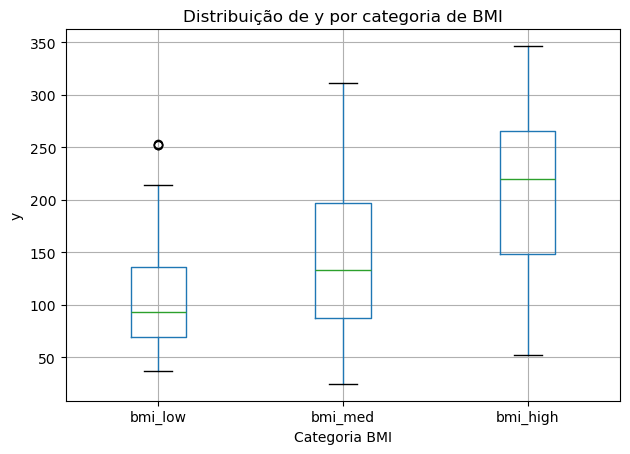

In [13]:
bmi_cut = pd.qcut(df['bmi'], 3, labels=['bmi_low','bmi_med','bmi_high'])
df_box  = df.assign(bmi_cat=bmi_cut)

plt.figure(figsize=(5,4))
df_box.boxplot(column='y', by='bmi_cat')
plt.title("Distribuição de y por categoria de BMI"); plt.suptitle("")
plt.xlabel("Categoria BMI"); plt.ylabel("y"); plt.tight_layout(); plt.show()


### 2.6 Interações suspeitas

Pense em pares de variáveis que **clinicamente** possam interagir (ex.: `bmi × bp`, `tc × hdl`).

* Desenhe um `scatter` colorindo pelo valor de `y` (`c=y, cmap="coolwarm"`).
* Há regiões onde `y` cresce só quando **ambas** estão altas?

Isso ajuda a decidir se vale um termo de interação de grau 2.

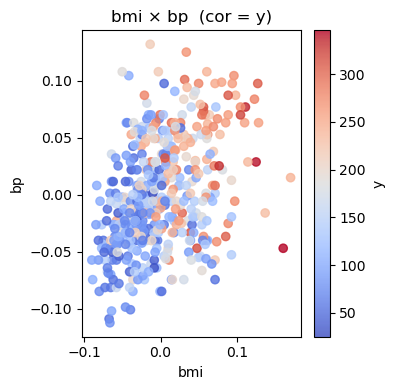

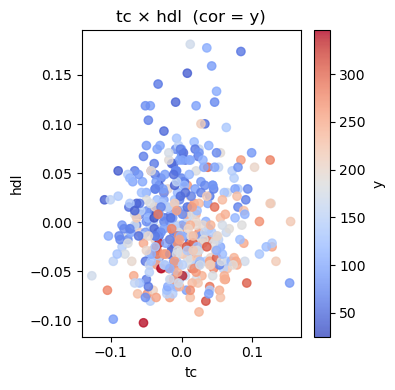

In [14]:
pairs = [('bmi','bp'), ('tc','hdl')]
for xvar, yvar in pairs:
    plt.figure(figsize=(4,4))
    sc = plt.scatter(df[xvar], df[yvar], c=df['y'], cmap='coolwarm', alpha=.8)
    plt.xlabel(xvar); plt.ylabel(yvar)
    plt.title(f"{xvar} × {yvar}  (cor = y)")
    plt.colorbar(sc, label='y'); plt.tight_layout(); plt.show()

### 2.7 Colinearidade local (VIF)

Compute o **Variance Inflation Factor** para as features originais.

* Alguma passa de 5 – 10?
* Se sim, vale a pena descartá-la antes de polinomializar?

,VIF
tc,59.202510
ldl,39.193370
hdl,15.402156
ltg,10.075967
tch_ratio,8.890986
bmi,1.509437
glu,1.484623
bp,1.459428
sex,1.278071
age,1.217307


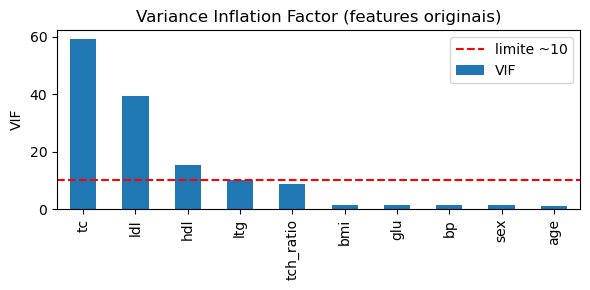

In [15]:
def vif_dataframe(X: pd.DataFrame) -> pd.DataFrame:
    """Calcula VIF para cada coluna de X (DataFrame NumPy-only)."""
    Xmat = X.values
    vif  = {}
    for i, col in enumerate(X.columns):
        y_i   = Xmat[:, i]
        X_oth = np.delete(Xmat, i, axis=1)
        # Ajuste via mínimos quadrados fechados
        coef  = np.linalg.pinv(X_oth.T @ X_oth) @ X_oth.T @ y_i
        y_hat = X_oth @ coef
        r2_i  = 1 - ((y_i - y_hat)**2).sum() / ((y_i - y_i.mean())**2).sum()
        vif[col] = 1 / (1 - r2_i)
    return pd.Series(vif, name='VIF').sort_values(ascending=False)

vif_series = vif_dataframe(df.drop(columns='y'))
display(vif_series.to_frame())

plt.figure(figsize=(6,3))
vif_series.plot(kind='bar')
plt.title("Variance Inflation Factor (features originais)")
plt.ylabel("VIF"); plt.axhline(10, color='r', ls='--', label='limite ~10')
plt.legend(); plt.tight_layout(); plt.show()

# 3. Engenharia de features

### 3.1 Implementar a projeção polinomial

Implementaremos uma pequena utility que gera `X_poly` contendo:
- termos individuais elevados a 2, 3,…, *d*  
- interações até ordem 2 (opcional, discuta vantagem/risco)

> **Exercício:** preencha a classe `PolynomialTransformer` abaixo.


In [ ]:
class PolynomialTransformer:
    """
    Gere colunas polinomiais a partir de um DataFrame numérico.

    Parameters
    ----------
    degree : int
        Grau máximo do polinômio (>=1).
    include_interaction : bool, default True
        Se True, inclui produtos cruzados de par de colunas (x_i * x_j).

    Métodos
    -------
    fit(X: pd.DataFrame) -> None
        Memoriza ordem das colunas originais.
    transform(X: pd.DataFrame) -> pd.DataFrame
        Devolve novo DataFrame com colunas polinomiais.
    fit_transform(X) -> pd.DataFrame
        Atalho para fit + transform.
    """
    def __init__(self, degree: int = 2, include_interaction: bool = True):
        self.degree = degree
        self.include_interaction = include_interaction
        self._cols_: list[str] = []

    def fit(self, X: pd.DataFrame) -> None:
        pass

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        pass

    def fit_transform(self, X: pd.DataFrame) -> pd.DataFrame:
        self.fit(X)
        return self.transform(X)


### 3.2— Implementação da normalização

Precisaremos normalizar *dentro* de cada fold se quisermos implementar o kfold no futuro.  
Complete a classe a seguir.

# 4. Implementação dos modelos

Sem usar scikit-learn, crie uma classe `PolynomialRegressor` que:

1. Recebe `degree` e `add_bias` (True/False).  
2. Gera internamente `X_poly` usando `PolynomialTransformer`.  
3. Ajusta peso **β = (XᵀX)⁻¹ Xᵀ y** (ou pseudoinversa).  
4. `predict(X)` devolve `ŷ`.

Inclua docstrings deixando claro:

- Tipos esperados (`pd.DataFrame`, `np.ndarray`, etc.)  
- Formas dos arrays  
- Atributos salvos: `beta_`, `cols_`, `degree_`

In [ ]:
class PolynomialRegressor:
    """
    Regressão polinomial via mínimos quadrados fechados.

    Parameters
    ----------
    degree : int, default 2
    include_interaction : bool, default True
    add_bias : bool, default True
    """
    def __init__(self, degree:int=2, include_interaction:bool=True, add_bias:bool=True):
        pass

    def fit(self, X: pd.DataFrame, y: pd.Series) -> "PolynomialRegressor":
        """
        Ajusta β.  X deve ser numérico; y, 1-d.
        """
        pass

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """
        Retorna vetor 1-d de previsões.
        """
        pass

    # Métricas utilitárias
    @staticmethod
    def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.sqrt(((y_true - y_pred)**2).mean())

    @staticmethod
    def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.abs(y_true - y_pred).mean()


# 5 Implementação K-Fold Cross-Validation

Implemente um loop que:

1. Sorteia `k` splits estratificados (aleatórios, mas `shuffle=True`).  
2. Para cada fold:  
   - **(a)** normaliza `X_train` via `StandardScalerNP` se `normalize=True`  
   - **(b)** treina `PolynomialRegressor`  
   - **(c)** mede RMSE no `X_val` correspondente  
3. Devolve lista de scores.

> **Exercício:** complete `KFoldCV` abaixo.

In [17]:
class KFoldCV:
    def __init__(self, n_splits:int=5, random_state:int|None=None, shuffle:bool=True):
        self.n_splits = n_splits
        self.random_state = random_state
        self.shuffle = shuffle

    def split(self, X: pd.DataFrame) -> list[tuple[np.ndarray,np.ndarray]]:
        """
        Retorna lista de pares (idx_train, idx_val) para cada fold.
        """
        # TODO
        pass

    def cross_val_score(self, model, X: pd.DataFrame, y: pd.Series,
                        metric:str="rmse", normalize:bool=True) -> list[float]:
        """
        Executa o loop k-fold e devolve score de cada fold.
        """
        # TODO
        pass


# Seção 6 — Grid Search

Vamos testar:

- `degree ∈ {1, 2, 3, 4}`  
- `normalize ∈ {True, False}`  

Critério de escolha: **menor RMSE médio** (porque o QQ-plot mostrou quase normalidade).

Preencha a função.

In [ ]:
def grid_search(X: pd.DataFrame, y: pd.Series,
                degrees:list[int], normalize_opts:list[bool],
                k:int=5, random_state:int=0) -> pd.DataFrame:
    """
    Retorna DataFrame com colunas: degree, normalize, rmse_mean, rmse_std
    """
    # TODO: loop pelas combos, usar KFoldCV.cross_val_score
    pass


### 6.1 Rodando o grid

In [ ]:
grid_results = grid_search(
    X=df.drop(columns="y"),
    y=df["y"],
    degrees=[1,2,3,4],
    normalize_opts=[True, False],
    k=5,
    random_state=42
)
display(grid_results.sort_values("rmse_mean"))


## Seção 7 — Avaliação do melhor modelo e visualização

1. Re-treine no dataset **inteiro** com o par (degree, normalize) campeão.  
2. Plote:

   - `y_true` vs `y_pred` (linha 45°)  
   - Distribuição dos resíduos  
   - Resíduos vs `y_pred` (checar heteroscedasticidade)

3. Calcule RMSE e MAE finais.  
4. Escreva um parágrafo comentando se o aumento de grau realmente trouxe
   ganho substantivo (olhe redução de RMSE, overfitting, etc.).

# Seção 8 — Extensões (opcional para quem quiser ir além)

- Adicionar regularização (Ridge) no sistema normal, como isso impacta o gridsearch?
- Testar interação seletiva (ex.: só bmi×bp) em vez de full quadrático  
- Implementar Early Stopping via aprendizagem incremental (GD)  
- Comparar com scikit-learn `Pipeline` + `PolynomialFeatures` + `RidgeCV`

- Opções de mais Datasets para experimentar o código que você implementou:


| Dataset                       | Fonte         | Target a prever               | Por que é difícil?                                                                                     | Link                                                                                                                                                                                     |
| ----------------------------- | ------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Energy Efficiency             | UCI (ENB2012) | Heating Load e Cooling Load   | Relação altamente curvada com espessura de parede, orientação e janelas; há dois alvos correlacionados | [https://archive.ics.uci.edu/ml/datasets/Energy+efficiency](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)                                                                   |
| Yacht Hydrodynamics           | UCI           | Resistance (drag)             | Só 308 amostras → risco de overfitting; interações fluido-dinâmicas não-lineares                       | [https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics](https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics)                                                               |
| Airfoil Self-Noise            | UCI           | Sound Pressure Level (dB)     | Forte heteroscedasticidade; resposta cai log-like com Reynolds × frequência                            | [https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)                                                                 |
| Bike Sharing (Day)            | UCI           | cnt (total bikes/dia)         | Variações sazonais + feriado criam padrões peri-ódicos; interações tempo-tempo (temp², hum×vento)      | [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)                                                             |
| Concrete Compressive Strength | UCI           | Concrete Compressive Strength | Misturas de materiais produzem curvas cúbicas; \~1 000 amostras mas 9 features correlatas              | [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)                                           |
| Wine Quality (Red)            | UCI           | quality (0–10)                | Variável alvo discreta com ruído; relações ácidas quadráticas                                          | [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) |
| Auto MPG                      | UCI           | mpg                           | Dados faltantes; forte colinearidade (displacement × cylinders)                                        | [https://archive.ics.uci.edu/ml/datasets/Auto+MPG](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)                                                                                     |
